<a href="https://colab.research.google.com/github/kfarhad01/MyFirstRepo/blob/main/%5BTemplate%5D_Product_Faculty_AI_Product_Certification_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

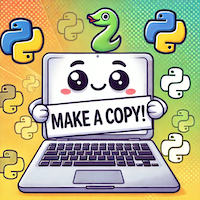

# Submission 1
This is the first deliverable. It is due at the end of week 1.

## Journey Map
Use this to identify your pain points and opportunities

## Problem Details
**Industry:**

**Persona:**

**Product:**

### Journey Stages & Activities (4 - 6 journey steps)
Identify the high level stages and activities that the customer goes through to complete the goal that they are trying to achieve.*italicised text*

### Key Pain-points (4 - 6 pain-points)
Identify the most prominent pain points that could be addressed to improve the customer's path to their goal. (i.e. where would the lowest NPS be)

### Identify Improvement Opportunities with LLMs
Ideate the top 2-3 solutions that you would tackle to address the biggest pain point.

## AI Application Opportunity Canvas

Use this opportunity canvas to go into detail about the top solution you've chosen.

### What's the opportunity?

#### Users & Customers
What types of users and customers have the challenges your solution addresses?

[Your answer here]

#### Problems
What problems do prospective users and customers have today that your solution addresses?

[Your answer here]

#### Leap-of-Faith Assumptions
What about the user problem or solution would cause you unrecoverable failure, if this assumption turns out to be false?

[Your answer here]

#### Business Problems
What problem for our company does building this product, feature or enhancement solve?

[Your answer here]

### How will we approach it?

#### Solution Ideas
List product, feature or enhancement ideas that solve problems for your target audience.

[Your answer here]

#### Solutions Today
How do users address their problems today?

[Your answer here]

#### Budget
What's it worth to you? How much money and/or development would you budget to discover, build and refine this solution?

[Your answer here]

### What does success look like?

#### User Value
If your target audience has your solution, how can they do things differently as a consequence? And, how will that benefit them?

[Your answer here]

#### User Metrics
What user behaviors can you measure that will indicate they adopt, use and place value in your solution?

[Your answer here]

#### Adoption Strategy
How will customers and users discover and adopt your solution?

[Your answer here]

#### Business Metrics
What business performance metrics will be affected by the success of this solution?

[Your answer here]

# Executing Prompts
## Submission 2
This is the second deliverable. It includes both the ability to prompt and the set of evaluations you wish to include in your testing. This notebook is the easier way to submit this deliverable. Alternatives can be sharing through the OpenAI playground or a Google Sheet.

Evaluations can be preapred on a Google Sheet as well, but in order to test them you'll want to use the promptfoo set up in this notebook.

## Setup and Configuration

This section sets up the necessary environment for your AI application prototyping.

In [ ]:
# Run this cell to import required libraries
import os
from google.colab import userdata

os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')
# os.environ["HF_API_TOKEN"] = userdata.get('HF_API_TOKEN')

The code above sets up your environment variables for OpenAI and Hugging Face API keys. Make sure you have added these keys to your Google Colab secrets before running this notebook.

In [ ]:
!curl -sL https://deb.nodesource.com/setup_18.x | sudo -E bash -
!sudo apt-get install -y nodejs

This cell installs Node.js, which is required for some of the tools we'll be using in this notebook.

### Setting up promptfoo for Evaluation

promptfoo is a tool that helps in evaluating and testing prompts. We'll use it to assess the quality and consistency of our AI responses.

During the install, you will be asked two questions. You won't be able to install until you've completed those two questions.

In [ ]:
# Set up promptfoo
%env npm_config_yes=true
!npx promptfoo@latest init

## Initial Prompting and Evaluation Process

1. Define your initial prompts in the `prompts.txt` file.
2. Set up your test cases and expected outputs in the `promptfooconfig.yaml` file.
3. Run the evaluation using the `npx promptfoo@latest eval` command.
4. Analyze the results and iterate on your prompts as needed.
5. Repeat steps 1-4 until you're satisfied with the performance of your prompts.

### Understanding Configuration Files

Before we start the evaluation process, let's understand the two main configuration files you'll be working with: `prompts.txt` and `promptfooconfig.yaml`.

#### prompts.txt

This file contains the prompts you want to test. You can include multiple prompts, each separated by `---`. Here's a simplified example:

```
You are a friendly AI assistant for a bookstore. Greet the customer by name and answer their question.

Customer: {{name}}
Question: {{question}}
---
You are a formal librarian. Address the patron by title and surname, then answer their inquiry.

Patron: {{name}}
Inquiry: {{question}}
```

In this example:
- We have two different prompts, each with a unique personality.
- `{{name}}` and `{{question}}` are placeholders that will be filled with actual values during testing.
- The `---` separates different prompts.

In [ ]:
%%writefile prompts.txt
You are a coding assistant, answer the user's qusetions with code samples
Personality: {{peronsality}}
Customer: {{name}}
Question: {{question}}

Writing prompts.txt


#### promptfooconfig.yaml

This file configures how your prompts will be tested. Here's a simple example:

```yaml
prompts: [prompts.txt]
providers: [openai:chat:gpt-4o, openai:chat:gpt-4o-mini]
tests:
  - vars:
      name: Alice Smith
      question: Do you have any book recommendations for a 10-year-old?
  - vars:
      name: Dr. John Doe
      question: I'm looking for academic journals on marine biology.
```

Let's break this down:
- `prompts: [prompts.txt]` specifies the file containing our prompts.
- `providers:` lists the AI models we want to test with. Here, we're using GPT-4o and GPT-4o-mini.
- `tests:` defines our test cases. Each test case is a set of variables that will be inserted into our prompts.

#### Using These Files

1. The system will take each prompt from `prompts.txt`.
2. For each prompt, it will run through all the test cases defined in `promptfooconfig.yaml`.
3. Each test case will be sent to all specified providers (AI models).

So, in our example:
- We'll get responses for both the "friendly bookstore assistant" and "formal librarian" prompts.
- Each prompt will be tested with both Alice's and Dr. Doe's questions.
- All of these combinations will be tested on both GPT-4o and GPT-4o-mini.

This allows you to compare how different prompts and AI models perform across various scenarios.

#### Advanced Configuration

You can add more advanced features to your `promptfooconfig.yaml`, such as:

```yaml
defaultTest:
  assert:
    - type: contains-any
      value: ["book", "reading", "literature"]

evaluateOptions:
  maxConcurrency: 5
  repeat: 2
```

- `defaultTest` applies assertions to all tests. Here, we're checking if the response contains book-related words.
- `evaluateOptions` sets evaluation parameters. We're running 5 tests concurrently and repeating each test twice for consistency.

Remember, start simple and add complexity as you become more comfortable with the system.

In [ ]:
%%writefile promptfooconfig.yaml
prompts: [prompts.txt]
providers:
  - id: openai:chat:gpt-4o
    config:
      temperature: 0.1
      max_tokens: 2000
  - id: openai:chat:gpt-4o-mini
    config:
      temperature: 0.1
      max_tokens: 2000
defaultTest:
  assert:
    - type: icontains-any
      value: ["code", "html"]
evaluateOptions:
  maxConcurrency: 5
  repeat: 2
tests:
  - vars:
      personality: joyful
      name: Alice Smith
      question: I'm making a website for helping bookstores
  - vars:
      personality: scientific
      name: Dr. John Doe
      question: I'm looking to summarize ml articles for users
  - vars:
      personality: annoyed
      name: Sikander Ali
      question: I am looking to integrate AI

Overwriting promptfooconfig.yaml


Modify this configuration file to suit your specific testing needs. You can add more test cases and assertions as needed.

### Results

In [ ]:
!npx promptfoo@latest eval -c /content/promptfooconfig.yaml --no-progress-bar

⠙⠹⠸⠼⠴⠦⠧⠇Cache is disabled.

┌────────────────────────┬────────────────────────┬────────────────────────┬────────────────────────┬────────────────────────┐
│ name                   │ personality            │ question               │ [openai:chat:gpt-4o]   │ [openai:chat:gpt-4o-m… │
│                        │                        │                        │ /content/prompts.txt:  │ /content/prompts.txt:  │
│                        │                        │                        │ You are a coding       │ You are a coding       │
│                        │                        │                        │ assistant, answer the  │ assistant, answer the  │
│                        │                        │                        │ user's qusetions with  │ user's qusetions with  │
│                        │                        │                        │ code samples           │ code samples           │
│                        │                        │                        │ Person

This command runs the evaluation using the configuration we just set up. It will provide insights into how well your prompts are performing.

In [ ]:
!npx promptfoo@latest share --yes

The above command loads the results into a webpage so that it's easier for you to view.

# OpenAI Assistants API: An Alternative to Custom RAG

## Submission 3
In this section, we'll explore the OpenAI Assistants API as an alternative to our custom RAG solution. The Assistants API provides a powerful, out-of-the-box solution for creating AI assistants with built-in retrieval capabilities.

## Setting Up an Assistant

First, let's create an Assistant using the OpenAI API. You can skip these steps by going to the [Assistant Setup in the OpenAI API Platform](https://platform.openai.com/assistants/)

In [ ]:
# Create example data files
import json
import csv
from io import StringIO

# Convert CSV data to JSON
csv_data = """Year,Revenue,Expenses,Profit
2020,1000000,800000,200000
2021,1200000,900000,300000
2022,1500000,1100000,400000
2023,1800000,1300000,500000"""

csv_file = StringIO(csv_data)
reader = csv.DictReader(csv_file)
json_data = json.dumps([row for row in reader], indent=2)

# Write JSON data to file
with open('financial_data.json', 'w') as f:
    f.write(json_data)

In [ ]:
%%writefile company_info.txt
Our company, TechInnovate Inc., was founded in 2015. We specialize in developing AI-powered software solutions for small and medium-sized businesses. Our main competitors are DataSmart Solutions, AICore Technologies, and FutureTech Innovations. We currently hold approximately 15% market share in the AI software solutions sector for SMBs.

Our projected earnings for Q1 2024 are estimated to be around $600,000, showing a steady growth trend from previous quarters. We have recently expanded our operations to include cloud-based services, which is expected to drive significant revenue growth in the coming years.

Overwriting company_info.txt


In [ ]:
from openai import OpenAI
import time

client = OpenAI()

# Step 1: Create a Vector Store
vector_store = client.beta.vector_stores.create(name="Financial Statements")
print(f"Vector Store created with ID: {vector_store.id}")

# Step 2: Upload files
file_ids = []

# Ready the files for upload to OpenAI
file_paths = ["financial_data.json", "company_info.txt"]
file_streams = [open(path, "rb") for path in file_paths]

# Use the upload and poll SDK helper to upload the files, add them to the vector store,
# and poll the status of the file batch for completion.
file_batch = client.beta.vector_stores.file_batches.upload_and_poll(
  vector_store_id=vector_store.id, files=file_streams
)

# Step 3: Create an assistant (without vector store initially)
assistant = client.beta.assistants.create(
    name="Financial Analyst Assistant",
    instructions="You are an expert financial analyst for TechInnovate Inc. Use the provided financial data and company information to answer questions accurately and concisely.",
    model="gpt-4o",
    tools=[{"type": "file_search"}],
    tool_resources={"file_search": {"vector_store_ids": [vector_store.id]}},
)

print(f"Assistant created with ID: {assistant.id}")

Vector Store created with ID: vs_Yhy1PLvjyiq8Wn7702vxku13
Assistant created with ID: asst_B1aVYSbZt1mKpJjpxNyBOAGb


### Using the Assistant

Now that we've created our Assistant, let's use it to answer a question:

In [ ]:
def get_assistant_response(assistant_id, user_query):
    thread = client.beta.threads.create()

    message = client.beta.threads.messages.create(
        thread_id=thread.id,
        role="user",
        content=user_query
    )

    run = client.beta.threads.runs.create(
        thread_id=thread.id,
        assistant_id=assistant_id
    )

    # Wait for the run to complete
    while run.status != "completed":
        run = client.beta.threads.runs.retrieve(thread_id=thread.id, run_id=run.id)

    # Get the assistant's response
    messages = client.beta.threads.messages.list(thread_id=thread.id)
    return messages.data[0].content[0].text

# Test the Assistant
test_query = "What was our company's revenue growth rate last year?"
response = get_assistant_response(assistant.id, test_query)
print(f"Assistant's response: {response}")

Assistant's response: Text(annotations=[FileCitationAnnotation(end_index=615, file_citation=FileCitation(file_id='file-bGxuVCMGZPEsPNzeqtyCvqsP'), start_index=603, text='【4:0†source】', type='file_citation')], value='Last year, our company, TechInnovate Inc., had a revenue of $1,500,000 in 2022, and for the previous year, 2021, the revenue was $1,200,000. \n\nTo calculate the revenue growth rate, use the formula:\n\n\\[\n\\text{Growth Rate} = \\left( \\frac{\\text{Current Year Revenue} - \\text{Previous Year Revenue}}{\\text{Previous Year Revenue}} \\right) \\times 100\n\\]\n\nSubstituting the values:\n\n\\[\n\\text{Growth Rate} = \\left( \\frac{1,500,000 - 1,200,000}{1,200,000} \\right) \\times 100 = \\left( \\frac{300,000}{1,200,000} \\right) \\times 100 = 25\\%\n\\]\n\nThus, the revenue growth rate for TechInnovate Inc. last year was **25%**【4:0†source】.')


## Evaluating the Assistant
To evaluate our Assistant's performance we'll use Promptfoo. Let's set up the evaluation:



In [ ]:
# Create configuration file to evaluate the assisstant
%%writefile assistant_config.yaml
prompts: ['{{ query }}']

#update the assistant id with your actual assistant id
providers:
  - openai:assistant:asst_B1aVYSbZt1mKpJjpxNyBOAGb
defaultTest:
  assert:
    - type: llm-rubric
      value: Is this about finance?
tests:
  - vars:
      query: What was our company's revenue growth rate from 2022 to 2023?
    assert:
      - type: icontains-any
        value: ['20%', '300000', 'increase', '300,000']
      - type: answer-relevance
        threshold: 0.8
  - vars:
      query: Who are our main competitors and what is our market share?
    assert:
      - type: icontains-any
        value: ['DataSmart Solutions', 'AICore Technologies', 'FutureTech Innovations', '15%']
      - type: answer-relevance
        threshold: 0.8
  - vars:
      query: What is our projected earnings for Q1 2024?
    assert:
      - type: icontains-any
        value: ['600000', '$600,000']
      - type: answer-relevance
        threshold: 0.8

Overwriting assistant_config.yaml



## Results
Run the evaluation and view the results


In [ ]:
!npx promptfoo eval -c assistant_config.yaml --no-progress-bar

⠙⠹⠸⠼⠴⠦⠧Cache is disabled.

┌────────────────────────────────────────────────────────────┬────────────────────────────────────────────────────────────┐
│ query                                                      │ [openai:asst_B1aVYSbZt1mKpJjpxNyBOAGb] {{ query }}         │
├────────────────────────────────────────────────────────────┼────────────────────────────────────────────────────────────┤
│ What was our company's revenue growth rate from 2022 to    │ [FAIL] Relevance 0.63 is less than threshold 0.8           │
│ 2023?                                                      │ ---                                                        │
│                                                            │ [Ran file search]                                          │
│                                                            │ [Assistant] To determine the revenue growth rate from 2022 │
│                                                            │ to 2023 for TechInnovate Inc.:            

In [ ]:
!npx promptfoo@latest share --yes

⠙⠹⠸⠼⠴⠦⠧⠇View results: https://app.promptfoo.dev/eval/f:f1a32aec-075f-4bea-a193-56bb584c56f9
⠙

## Comparing Assistant API with Custom RAG

Now that we have evaluation results for both our custom RAG solution and the OpenAI Assistant, let's compare their performance:

1. Accuracy: Compare the answer relevance scores and the presence of key information in responses.
2. Consistency: Check if the Assistant provides more consistent answers across multiple runs.
3. Handling of complex queries: Evaluate how well each solution handles multi-part or nuanced questions.
4. Speed: Compare the response times of both solutions.
5. Resource usage: Consider the computational resources and API calls required for each approach.

Based on this comparison, you can decide which solution better fits your specific use case. The OpenAI Assistant may offer advantages in terms of ease of setup and maintained knowledge base, while a custom RAG solution might provide more flexibility and control over the retrieval process.

### Potential Improvements

Regardless of which solution you choose, consider these potential improvements:

1. Fine-tune the instructions or prompts to better match your specific use case.
2. Experiment with different models (e.g., GPT-4 vs GPT-3.5) to balance performance and cost.
3. Implement error handling and retries for more robust performance.
4. Add more comprehensive test cases to your Promptfoo evaluation to cover a wider range of scenarios.
5. Implement a feedback loop to continuously improve the assistant's performance based on user interactions.

By thoroughly evaluating and comparing both approaches, you can make an informed decision on whether to use the OpenAI Assistants API or continue developing your custom RAG solution.

# Note on Appendicies

The Appendecies section is for that that want to proceed beyond the scope of the general capstone. The sections and submissions above will give you the capabilities you need to both test your prompting and evaluation capabilities as well as integrating a RAG solution with the Assistants API.

The Appendencies push you further by giving you future things you can look at to further your understanding and exploration. They are not required and will not be reviewed unless specifically requested.

1. **Advanced Evaluation** - Using classifiers that have been trained for a specific purpose as an evaluation tool. For this you'll need to get a Hugging Face account and then create an API Token.

2. **Full RAG solution** - If you're looking to integrate with a vector store and create your own RAG solution, Appendix II will provide you with the framework to do so. This section is the most challenging to explore.

3. **Synthetic Data Generation** - This section is a simple prompt and a form based application that will accept a specified JSON format and a use case to help you generate some samples that you can use for the retrieval augmented generation.

4. **Images** - For those that are looking at exploring within the space of images, this appendix will cover evaluations in the image space. You will be able to both generate and interrogate images. Generation is done through teh Dall-E-3 model, and GPT4o accepts images as inputs to help you further classify.

5. **Audio** - While not easily avaialble for evaluation, this section will go through two forms of audio. TTS (Text to Speech) and Speech-to-Text. The former will generate an audio file from text using one of the available voices, while the latter will accept an audio file and create a transcription. As these modalities are relatively new, they are not supported on our evaluation tool.

# Appendix I - Advanced Evaluation

This section is guidance on how to use classifiers that have been trained by others and shared on Hugging Face in your evaluation process. It is not a requirement of the capstone.

You can find full [documentation on promptfoo](https://www.promptfoo.dev/docs/configuration/expected-outputs/) and the other types of assertions available on their website.

## Advanced Configuration: Using Classifiers

Classifiers can significantly enhance your evaluation process by automatically checking for specific qualities in AI responses. Let's look at some advanced examples using HuggingFace classifiers.

### Example 1: Emotion Classification

```yaml
prompts: [prompts.txt]
providers: [openai:chat:gpt-3.5-turbo, anthropic:claude-2]
defaultTest:
  options:
    provider: huggingface:text-classification:michellejieli/emotion_text_classifier
  assert:
    - type: classifier
      value: joy
      threshold: 0.8
tests:
  - vars:
      name: Sarah
      question: Can you recommend a gift for my best friend's birthday?
  - vars:
      name: Michael
      question: I just got a promotion at work! What should I do to celebrate?
```

This configuration:
- Uses an emotion classifier to ensure AI responses express joy.
- Applies this check to all test cases (using `defaultTest`).
- The responses must have a "joy" score of at least 0.8 to pass.

### Example 2: Toxicity Detection

```yaml
prompts: [prompts.txt]
providers: [openai:chat:gpt-3.5-turbo, anthropic:claude-2]
defaultTest:
  options:
    provider: huggingface:text-classification:facebook/roberta-hate-speech-dynabench-r4-target
  assert:
    - type: classifier
      value: nothate
      threshold: 0.9
tests:
  - vars:
      topic: Controversial political issues
  - vars:
      topic: Differences between cultures
```

This setup:
- Uses a hate speech detection model to ensure responses are not toxic.
- Requires a "nothate" score of at least 0.9 for each response.
- Tests the AI's ability to discuss potentially sensitive topics safely.

### Example 3: Multiple Classifiers

```yaml
prompts: [prompts.txt]
providers: [openai:chat:gpt-4o, openai:chat:gpt-4o-mini]
defaultTest:
  assert:
    - type: classifier
      provider: huggingface:text-classification:michellejieli/emotion_text_classifier
      value: joy
      threshold: 0.7
    - type: classifier
      provider: huggingface:text-classification:facebook/roberta-hate-speech-dynabench-r4-target
      value: nothate
      threshold: 0.9
    - type: not-classifier
      provider: huggingface:token-classification:bigcode/starpii
      threshold: 0.75
tests:
  - vars:
      name: Alex
      question: Can you tell me about your privacy policy?
  - vars:
      name: Jamie
      question: I'm feeling down today. Can you cheer me up?
```

This advanced configuration:
1. Checks for joyful emotion (threshold 0.7).
2. Ensures responses are not hateful (threshold 0.9).
3. Uses `not-classifier` to check that responses don't contain personal identifiable information (PII).

### Using These Advanced Configurations

To use these advanced configurations:

1. Ensure you have set up the necessary environment variables, especially `HF_API_TOKEN` for HuggingFace.
2. Modify your `promptfooconfig.yaml` file to include the desired classifiers.
3. Adjust the thresholds and test cases to suit your specific use case.
4. Run the evaluation to see how your AI responses perform against these criteria.

Remember, while these classifiers are powerful tools, they should be used thoughtfully. Always consider the context of your application and the limitations of the classifiers you're using.


# Appendix II - Prototyping a full RAG solution (Alternate)

This is not a required deliverable of the capstone project. However, if your solution needs to expand to include external context, you can use the information here to set up your prompting, retrieval, and evaluation.

## Retrieval Augmented Generation (RAG)

In this section, we'll explore how to enhance our AI application using Retrieval Augmented Generation (RAG). RAG is a method that combines the power of large language models with the ability to retrieve relevant information from a knowledge base.

### Setting Up RAG

1. First, we need to set up a vector store. This is where we'll store our document embeddings.

In [ ]:
# TODO: Set up vector store
# For example, using Pinecone:
# import pinecone
# pinecone.init(api_key="your-api-key", environment="your-environment")
# index = pinecone.Index("your-index-name")

print("Vector store placeholder - implement your chosen solution here")


Vector store placeholder - implement your chosen solution here


2. Next, we'll add some documents to our vector store.

In [ ]:
# TODO: Add documents to vector store
# Example:
# documents = [
#     "Document 1 content...",
#     "Document 2 content...",
#     "Document 3 content..."
# ]
#
# for i, doc in enumerate(documents):
#     vector = get_embedding(doc)  # You'll need to implement this function
#     index.upsert([(str(i), vector, {"text": doc})])

print("Document addition placeholder - implement your document processing here")

Document addition placeholder - implement your document processing here


3. Now, let's create a function to retrieve relevant documents based on a query.


In [ ]:
def retrieve_documents(query):
    # TODO: Implement document retrieval
    # Example:
    # query_vector = get_embedding(query)
    # results = index.query(query_vector, top_k=3, include_metadata=True)
    # return [result['metadata']['text'] for result in results['matches']]

    return ["Placeholder document 1", "Placeholder document 2"]

# Test the retrieval function
test_query = "What is the company's vacation policy?"
retrieved_docs = retrieve_documents(test_query)
print(f"Retrieved documents for query '{test_query}':")
for doc in retrieved_docs:
    print(f"- {doc}")


Retrieved documents for query 'What is the company's vacation policy?':
- Placeholder document 1
- Placeholder document 2


### Evaluating RAG

Now that we have our RAG setup, let's evaluate its performance. We'll use promptfoo to test both the document retrieval and the LLM output generation.

1. First, let's evaluate the document retrieval. Create a file named `retrieve.py`:

In [ ]:
%%writefile retrieve.py
def call_api(query, options, context):
    documents = retrieve_documents(query)
    output = "\n".join(f'Doc {i+1}: {doc}' for i, doc in enumerate(documents))
    return {"output": output}


Writing retrieve.py


2. Now, let's create a configuration file for evaluating document retrieval:



In [ ]:
%%writefile rag_retrieval_config.yaml
prompts: ['{{ query }}']
providers: ['python: retrieve.py']
tests:
  - vars:
      query: What is our company's vacation policy?
    assert:
      - type: contains-any
        value: ['vacation', 'time off', 'PTO']
  - vars:
      query: How does the 401k matching work?
    assert:
      - type: contains-any
        value: ['401k', 'retirement', 'matching']


Writing rag_retrieval_config.yaml


3. Next, let's set up the evaluation for the LLM output. Create a prompt file:

In [ ]:
%%writefile rag_prompt.txt
You are a corporate assistant. Answer the following question using the provided context:

Question: {{ query }}

Context:
{{ context }}

Answer:


Writing rag_prompt.txt


4. Create a configuration file for evaluating the LLM output:

In [ ]:
%%writefile rag_llm_config.yaml
prompts: [rag_prompt.txt]
providers: [openai:chat:gpt-4o, openai:chat:gpt-4o-mini]
tests:
  - vars:
      query: What is our company's vacation policy?
      context: retrieve.py
    assert:
      - type: contains-any
        value: ['vacation', 'time off', 'PTO']
      - type: answer-relevance
        threshold: 0.8
  - vars:
      query: How does the 401k matching work?
      context: retrieve.py
    assert:
      - type: contains-any
        value: ['401k', 'retirement', 'matching']
      - type: answer-relevance
        threshold: 0.8


Writing rag_llm_config.yaml


5. Run the evaluations:

In [ ]:
!npx promptfoo@latest eval -c /content/promptfooconfig.yaml --no-progress-bar

⠙⠹⠸⠼⠴⠦⠧⠇^C


In [ ]:
!npx promptfoo@latest share --yes

⠙⠹⠸^C


### Analyzing RAG Performance

After running the evaluations, analyze the results:

1. Check if the document retrieval is fetching relevant documents for each query.
2. Evaluate if the LLM is using the retrieved context effectively to answer questions.
3. Compare the performance of different LLM providers in the RAG setup.

Based on your analysis, you may need to:
- Adjust your document retrieval method
- Fine-tune your prompts
- Experiment with different LLM providers
- Enhance your test cases to cover more scenarios

Remember, the key to a successful RAG implementation is balancing good retrieval with effective use of the retrieved information by the LLM.

# Appendix III - Synthetic Data Generation

In [ ]:
pip install --upgrade openai

In [ ]:
# @title Synthetic Data Generator { vertical-output: true }
columns_input = ""
import ipywidgets as widgets
from IPython.display import display
from openai import OpenAI
import json
from google.colab import files
from google.colab import userdata

# Set your OpenAI API key
client = OpenAI(
  api_key = userdata.get('OPENAI_API_KEY')
)

# Create input widgets
columns_input = widgets.Textarea(
    value='Enter column definitions as JSON array (e.g., [{"name": "id", "type": "number"}, {"name": "name", "type": "string"}])',
    description='Columns:',
    disabled=False,
    layout=widgets.Layout(width='90%', height='100px')
)

use_case = widgets.Text(
    value='',
    placeholder='Enter the use case for data generation',
    description='Use Case:',
    disabled=False,
    layout=widgets.Layout(width='90%')
)

num_samples = widgets.IntSlider(
    value=10,
    min=1,
    max=500,
    step=1,
    description='Number of Samples:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

# Create a button to submit the form
button = widgets.Button(description="Generate Data")
output = widgets.Output()

def generate_synthetic_data(columns, use_case, num_samples):
    prompt = f"""
You are a synthetic data generator that creates realistic, varied data in JSON format based on given parameters. Your task is to generate a specified number of data samples for a given use case, using the provided column definitions.

Input variables:
<columns>
{columns}
</columns>

<use_case>
{use_case}
</use_case>

<num_samples>
{num_samples}
</num_samples>

Instructions for generating data:
1. Analyze the column definitions and use case to understand the data structure and context.
2. For each sample, generate appropriate values for each column based on its type and constraints:
   - For "string" types, generate realistic text based on the column name and use case.
   - For "number" types, generate appropriate numerical values within any specified ranges.
   - For "date" types, generate realistic dates considering the use case context.
   - For "boolean" types, generate true/false values with appropriate distribution.
   - For "enum" types, randomly select from the provided options.
3. Ensure that generated data is consistent with the use case and maintains logical relationships between columns.
4. Introduce variety in the generated data to make it realistic and diverse.

Structure the output as a JSON array of objects, where each object represents one data sample with key-value pairs for each column.

Guidelines for data variety and consistency:
- Avoid repetitive or patterned data; introduce randomness and variation.
- Maintain logical consistency between related fields (e.g., ensure "start_date" is before "end_date").
- Generate realistic names, addresses, and other string data that fit the use case context.
- For numerical data, use appropriate ranges and distributions based on the column name and use case.

Error handling and edge cases:
- If any column definitions are invalid or inconsistent, note this in your response and proceed with generating data for the valid columns.
- If the number of samples requested is 0 or negative, return an empty array.
- If the number of samples is unreasonably large (e.g., over 1000), generate only 1000 samples and note this limitation in your response.

Provide your output in the following format:
<output>
[
  {{
    "column1": "value1",
    "column2": "value2",
    ...
  }},
  {{
    "column1": "value1",
    "column2": "value2",
    ...
  }},
  ...
]
</output>

Before generating the data, if you need to clarify any aspects of the column definitions or use case, you may do so in a <clarification> tag. If no clarification is needed, proceed directly to generating the data.

Remember to generate exactly the number of samples specified in the <num_samples> input, unless it exceeds 1000 as mentioned in the error handling section.
    """

    response = completion = client.chat.completions.create(
      model="gpt-4o-mini",
      messages=[
            {"role": "system", "content": "You are a helpful assistant that generates synthetic data."},
            {"role": "user", "content": prompt}
      ]
    )

    # Extract the generated text from the API response
    generated_text = response.choices[0].message.content.strip()

    # Extract the JSON data from the <output> tags
    output_start = generated_text.find('<output>') + 8
    output_end = generated_text.find('</output>')
    json_data = generated_text[output_start:output_end].strip()

    # Parse the JSON data
    try:
        data = json.loads(json_data)
        return data
    except json.JSONDecodeError:
        print("Error: Unable to parse the generated data as JSON.")
        return None

# Define what happens when the button is clicked
def on_button_clicked(b):
    with output:
        output.clear_output()
        print("Generating synthetic data...")

        try:
            columns = json.loads(columns_input.value)
        except json.JSONDecodeError:
            print("Error: Invalid JSON in columns input. Please check your column definitions.")
            return

        data = generate_synthetic_data(json.dumps(columns), use_case.value, num_samples.value)

        if data is not None:
            print("Data generated successfully.")

            # Save the data as a JSON file
            with open('synthetic_data.json', 'w') as f:
                json.dump(data, f, indent=2)

            print("Data saved as 'synthetic_data.json'")

            # Option to download the JSON file
            files.download('synthetic_data.json')

            # Display a sample of the data (first 5 items)
            print("\nSample of generated data (first 5 items):")
            print(json.dumps(data[:5], indent=2))
        else:
            print("Failed to generate data. Please try again.")

button.on_click(on_button_clicked)

# Display the form
form = widgets.VBox([columns_input, use_case, num_samples, button, output])
display(form)

# Appendix IV - Images

This section provides examples of both accepting images as inputs and evaluating text based outputs in the case of a vision model, or generating an image using an image model (Dall-E).

## Generating Images
The next two blocks focus on image generation capabilities through teh Dall-E-3 Model.

In [ ]:
# Create configuration file to evaluate the image creation
%%writefile image_generation.yaml
prompts:
  - 'In the style of Van Gogh: {{subject}}'
  - 'In the style of Dali: {{subject}}'

providers:
  - openai:image:dall-e-3

tests:
  - vars:
      subject: bananas
  - vars:
      subject: new york city

Writing image_generation.yaml


In [ ]:
!npx promptfoo eval -c image_generation.yaml --no-progress-bar

In [ ]:
!npx promptfoo share --yes

## Image to Text
This section focuses on the image to text capabilities of vision models. These will allow you to support giving the model a combination of text and image as an input while generating text as an output.

In [ ]:
# Change the filename if you want to write multiple prompts
%%writefile prompt1.json
[
  {
    "role": "user",
    "content": [
      {
        "type": "text",
        "text": "{{question}}"
      },
      {
        "type": "image_url",
        "image_url": {
          "url": "{{url}}"
        }
      }
    ]
  }
]

In [ ]:
# Create configuration file to evaluate the image creation
%%writefile image_to_text.yaml
prompts:
  - prompt1.json
# Reference multiple prompt files for each image prompt
# - prompt2.json

providers:
  - openai:gpt-4o

tests:
  - vars:
      question: 'What do you see?'
      url: 'https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg'
  - vars:
      question: "What artist's style is this"
      url: 'https://oaidalleapiprodscus.blob.core.windows.net/private/org-fJzubGeVCjR7idGn6N6fY1oa/user-ahGPutEOqMsTKLUZyDJiteIM/img-IqqfLcdlhNHjxaHXxVxk3wRu.png?st=2024-08-13T23%3A31%3A54Z&se=2024-08-14T01%3A31%3A54Z&sp=r&sv=2023-11-03&sr=b&rscd=inline&rsct=image/png&skoid=d505667d-d6c1-4a0a-bac7-5c84a87759f8&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2024-08-13T22%3A34%3A17Z&ske=2024-08-14T22%3A34%3A17Z&sks=b&skv=2023-11-03&sig=xCFsEcWT7oAqxewOi1slB/ECcXmjHpAOuR6HLj8WyfI%3D'

In [ ]:
!npx promptfoo eval -c image_to_text.yaml --no-progress-bar

In [ ]:
!npx promptfoo share --yes

# Appendix V - Audio

This section focuses on generation capabilities. Unfortunately, evaluation isn't yet supported, so you will need to create a dataset that you can then use in evaluation separately.

## Text to Speech

Use one of the available voices to generate an mp3 version of the audio. You can use this with a model like GPT4o to generate a script and turn it into an audio file.

[Addiitonal Documentation](https://platform.openai.com/docs/guides/text-to-speech)

In [ ]:
from openai import OpenAI

client = OpenAI()

response = client.audio.speech.create(
    model="tts-1",
    voice="onyx",
    # Available voices - (alloy, echo, fable, onyx, nova, and shimmer)
    input="Hello Product Faculty! This is an audio test",
)

response.stream_to_file("output.mp3")

<ipython-input-27-09d0a17d5dfb>:12: DeprecationWarning: Due to a bug, this method doesn't actually stream the response content, `.with_streaming_response.method()` should be used instead
  response.stream_to_file("output.mp3")


## Speech to Text

The Speech to Text model, AKA Whisper, will let you take an audio input and create the transcription. For this demonstration, we're using the audio file generated in the TTS (Text-to-Speech) step above.

[Additional Documentation](https://platform.openai.com/docs/guides/speech-to-text)

In [ ]:
from openai import OpenAI
client = OpenAI()

audio_file = open("output.mp3", "rb")
transcription = client.audio.transcriptions.create(
  model="whisper-1",
  file=audio_file,
  response_format="text"
)
print(transcription)

Hello product faculty, this is an audio test.

